In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 


ACTIVATION FUNCTION USED:RELU

MLP WITH 2 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + BN + ADAM OPTIMIZER



```

```



In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first and second hidden layer 450 and 125 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.10 => N(0,σ) = N(0,0.10)

model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

W0831 05:40:39.975041 139681382659968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 05:40:40.013561 139681382659968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 05:40:40.022308 139681382659968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0831 05:40:40.108067 139681382659968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0831 05:40:40.201143 13

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 398,610
Trainable params: 397,410
Non-trainable params: 1,200
_________________________________________________________________


In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0831 05:40:41.141289 139681382659968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0831 05:40:41.260355 139681382659968 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2022 - acc: 0.9391 - val_loss: 0.0977 - val_acc: 0.9699
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0714 - acc: 0.9780 - val_loss: 0.0807 - val_acc: 0.9744
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0455 - acc: 0.9858 - val_loss: 0.0805 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0301 - acc: 0.9906 - val_loss: 0.0814 - val_acc: 0.9744
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0730 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.1002 - val_acc: 0.9720
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0868 - val_ac

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    

Test score: 0.08089693493220357
Test accuracy: 0.9816


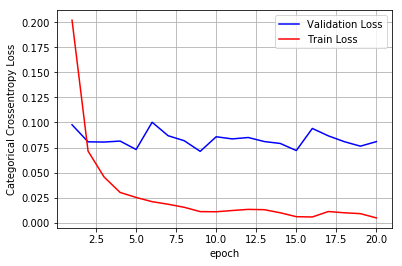

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

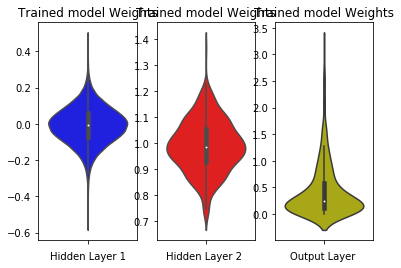

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 2 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + DROPOUT + ADAM OPTIMIZER


In [0]:
#importing batchNormalization
from keras.layers import Dropout
model_relu = Sequential()
#Let's take dimension of first and second hidden layer 400 and 200 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.10  => N(0,σ) = N(0,0.10)

model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

W0831 05:41:56.064811 139681382659968 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#let no of epoch=25
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 44us/step - loss: 0.5387 - acc: 0.8311 - val_loss: 0.1672 - val_acc: 0.9500
Epoch 2/25
60000/60000 [==============================] - 2s 37us/step - loss: 0.2351 - acc: 0.9300 - val_loss: 0.1253 - val_acc: 0.9622
Epoch 3/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.1796 - acc: 0.9467 - val_loss: 0.0958 - val_acc: 0.9711
Epoch 4/25
60000/60000 [==============================] - 2s 37us/step - loss: 0.1492 - acc: 0.9549 - val_loss: 0.0869 - val_acc: 0.9738
Epoch 5/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.1336 - acc: 0.9601 - val_loss: 0.0845 - val_acc: 0.9754
Epoch 6/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.1168 - acc: 0.9642 - val_loss: 0.0764 - val_acc: 0.9767
Epoch 7/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.1061 - acc: 0.9678 - val_loss: 0.0773 - val_acc

Test score: 0.06799671714007836
Test accuracy: 0.9842


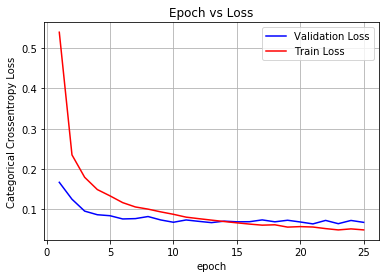

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

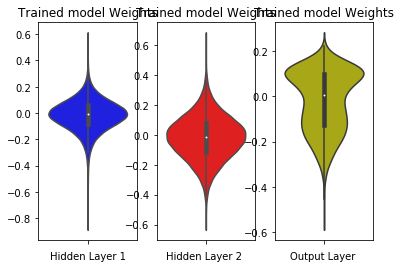

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 2 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + BN +DROPOUT+ ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_relu = Sequential()
#Let's take dimension of first and second hidden layer 400 and 200 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.10  => N(0,σ) = N(0,0.10)

model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               80200     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#let no of epoch=25
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 69us/step - loss: 0.4877 - acc: 0.8507 - val_loss: 0.1570 - val_acc: 0.9516
Epoch 2/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.2273 - acc: 0.9306 - val_loss: 0.1186 - val_acc: 0.9615
Epoch 3/25
60000/60000 [==============================] - 3s 58us/step - loss: 0.1809 - acc: 0.9447 - val_loss: 0.0951 - val_acc: 0.9701
Epoch 4/25
60000/60000 [==============================] - 3s 56us/step - loss: 0.1507 - acc: 0.9542 - val_loss: 0.0876 - val_acc: 0.9723
Epoch 5/25
60000/60000 [==============================] - 3s 56us/step - loss: 0.1335 - acc: 0.9592 - val_loss: 0.0775 - val_acc: 0.9746
Epoch 6/25
60000/60000 [==============================] - 3s 56us/step - loss: 0.1199 - acc: 0.9627 - val_loss: 0.0774 - val_acc: 0.9772
Epoch 7/25
60000/60000 [==============================] - 3s 58us/step - loss: 0.1062 - acc: 0.9671 - val_loss: 0.0720 - val_acc

Test score: 0.05408695615465985
Test accuracy: 0.9841


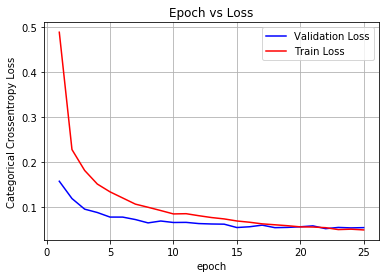

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

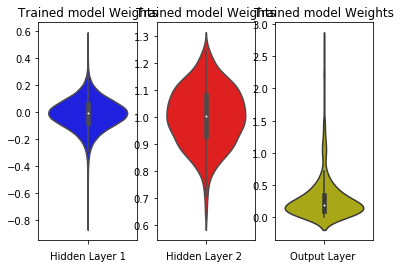

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

ACTIVATION FUNCTION:SIGMOID

MLP WITH 2 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + BN + ADAM OPTIMIZER


In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_sigmoid = Sequential()
#Let's take dimension of first and second hidden layer 450 and 125 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.10 => N(0,σ) = N(0,0.10)

model_sigmoid.add(Dense(400, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dense(200, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
dense_11 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2010      
Total params: 398,610
Trainable params: 397,410
Non-trainable params: 1,200
_________________________________________________________________


In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2653 - acc: 0.9218 - val_loss: 0.1539 - val_acc: 0.9535
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1237 - acc: 0.9641 - val_loss: 0.1110 - val_acc: 0.9682
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0834 - acc: 0.9767 - val_loss: 0.0887 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0562 - acc: 0.9838 - val_loss: 0.0806 - val_acc: 0.9751
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0405 - acc: 0.9883 - val_loss: 0.0916 - val_acc: 0.9704
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0294 - acc: 0.9920 - val_loss: 0.0705 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.0676 - val_acc

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.08308830091994242
Test accuracy: 0.9796


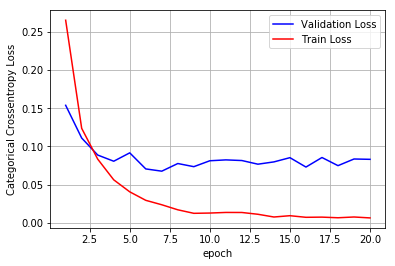

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

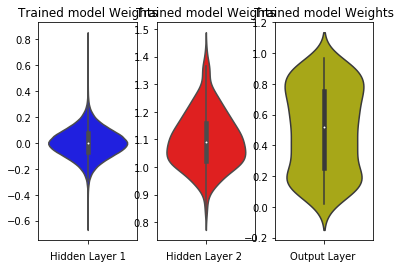

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 2 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + DROPOUT + ADAM OPTIMIZER


In [0]:
#importing batchNormalization
from keras.layers import Dropout
model_sigmoid = Sequential()
#Let's take dimension of first and second hidden layer 400 and 200 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.10  => N(0,σ) = N(0,0.10)

model_sigmoid.add(Dense(400, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(200, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#let no of epoch=25
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 48us/step - loss: 0.7854 - acc: 0.7540 - val_loss: 0.2934 - val_acc: 0.9140
Epoch 2/25
60000/60000 [==============================] - 2s 36us/step - loss: 0.3518 - acc: 0.8956 - val_loss: 0.2228 - val_acc: 0.9340
Epoch 3/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.2784 - acc: 0.9169 - val_loss: 0.1782 - val_acc: 0.9451
Epoch 4/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.2313 - acc: 0.9322 - val_loss: 0.1517 - val_acc: 0.9522
Epoch 5/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.1971 - acc: 0.9412 - val_loss: 0.1304 - val_acc: 0.9597
Epoch 6/25
60000/60000 [==============================] - 2s 38us/step - loss: 0.1759 - acc: 0.9486 - val_loss: 0.1157 - val_acc: 0.9648
Epoch 7/25
60000/60000 [==============================] - 2s 39us/step - loss: 0.1552 - acc: 0.9540 - val_loss: 0.1079 - val_acc

Test score: 0.059590791859611636
Test accuracy: 0.9814


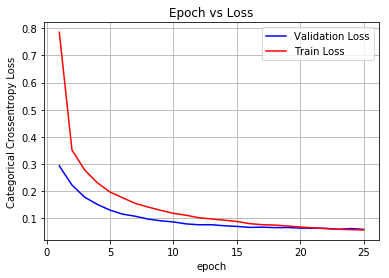

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

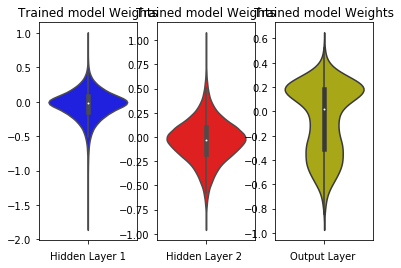

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 2 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + DROPOUT+BN + ADAM OPTIMIZER


In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_sigmoid = Sequential()
#Let's take dimension of first and second hidden layer 400 and 200 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.10  => N(0,σ) = N(0,0.10)

model_sigmoid.add(Dense(400, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(200, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.10, seed=None)) )
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_9 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_9 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#let no of epoch=25
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 77us/step - loss: 0.5333 - acc: 0.8416 - val_loss: 0.2566 - val_acc: 0.9276
Epoch 2/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.3384 - acc: 0.8994 - val_loss: 0.2075 - val_acc: 0.9396
Epoch 3/25
60000/60000 [==============================] - 3s 58us/step - loss: 0.2831 - acc: 0.9136 - val_loss: 0.1785 - val_acc: 0.9478
Epoch 4/25
60000/60000 [==============================] - 3s 56us/step - loss: 0.2490 - acc: 0.9259 - val_loss: 0.1585 - val_acc: 0.9535
Epoch 5/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.2245 - acc: 0.9328 - val_loss: 0.1428 - val_acc: 0.9560
Epoch 6/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.2037 - acc: 0.9383 - val_loss: 0.1247 - val_acc: 0.9611
Epoch 7/25
60000/60000 [==============================] - 3s 57us/step - loss: 0.1834 - acc: 0.9453 - val_loss: 0.1158 - val_acc

Test score: 0.05941618691360345
Test accuracy: 0.982


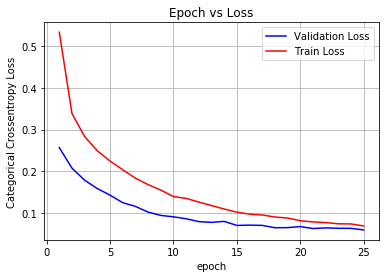

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,26))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

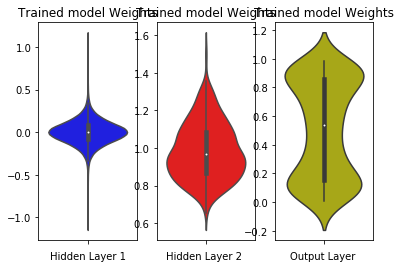

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 3 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + BN +*ADAM* OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first, second and third hidden layer 500, 300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.054  => N(0,σ) = N(0,0.054)
# h2 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h3 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)

model_relu.add(Dense(550, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))


model_relu.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )

#Adding batchNormalization in hidden layer 2 to perform better internal covariate shift
model_relu.add(BatchNormalization())

model_relu.add(Dense(125, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 550)               431750    
_________________________________________________________________
dense_23 (Dense)             (None, 250)               137750    
_________________________________________________________________
batch_normalization_11 (Batc (None, 250)               1000      
_________________________________________________________________
dense_24 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1260      
Total params: 603,135
Trainable params: 602,635
Non-trainable params: 500
_________________________________________________________________


In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2087 - acc: 0.9376 - val_loss: 0.1197 - val_acc: 0.9642
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0810 - acc: 0.9744 - val_loss: 0.0997 - val_acc: 0.9693
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0536 - acc: 0.9829 - val_loss: 0.0910 - val_acc: 0.9741
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0415 - acc: 0.9866 - val_loss: 0.1113 - val_acc: 0.9687
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0329 - acc: 0.9894 - val_loss: 0.0972 - val_acc: 0.9723
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0290 - acc: 0.9902 - val_loss: 0.0893 - val_acc: 0.9712
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0233 - acc: 0.9923 - val_loss: 0.0756 - val_acc

Test score: 0.0699115529236206
Test accuracy: 0.9829


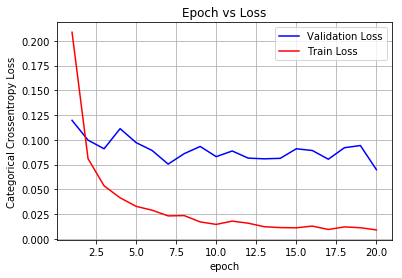

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

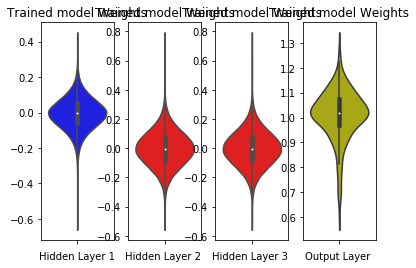

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)

out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 3 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + BN + DROPOUT + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first, second and third hidden layer 550, 250 and 1250 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.054  => N(0,σ) = N(0,0.054)
# h2 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h3 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)



model_relu.add(Dense(550, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))
model_relu.add(Dropout(0.5))

model_relu.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )

#Adding batchNormalization in hidden layer 2 to perform better internal covariate shift
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(125, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 550)               431750    
_________________________________________________________________
dropout_11 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 250)               137750    
_________________________________________________________________
batch_normalization_12 (Batc (None, 250)               1000      
_________________________________________________________________
dropout_12 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 125)               31375     
_________________________________________________________________
dropout_13 (Dropout)         (None, 125)              

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 1.0482 - acc: 0.7238 - val_loss: 0.2199 - val_acc: 0.9360
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.3537 - acc: 0.8963 - val_loss: 0.1499 - val_acc: 0.9543
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2581 - acc: 0.9263 - val_loss: 0.1230 - val_acc: 0.9638
Epoch 4/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.2114 - acc: 0.9397 - val_loss: 0.1043 - val_acc: 0.9681
Epoch 5/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1774 - acc: 0.9493 - val_loss: 0.0942 - val_acc: 0.9714
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1611 - acc: 0.9541 - val_loss: 0.0897 - val_acc: 0.9723
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1438 - acc: 0.9585 - val_loss: 0.0874 - val_acc

Test score: 0.06166566658409138
Test accuracy: 0.9834


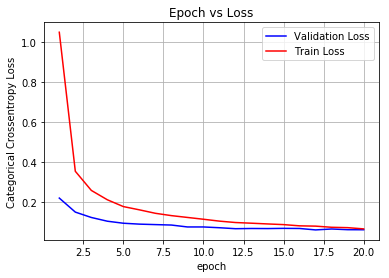

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

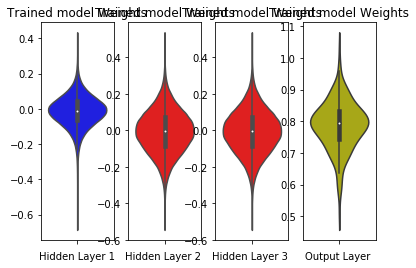

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)

out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 3 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + DROPOUT + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers import Dropout
model_relu = Sequential()
#Let's take dimension of first, second and third hidden layer 550, 250 and 1250 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.054  => N(0,σ) = N(0,0.054)
# h2 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h3 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)


model_relu.add(Dense(550, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(125, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 550)               431750    
_________________________________________________________________
dropout_14 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 250)               137750    
_________________________________________________________________
dropout_15 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 125)               31375     
_________________________________________________________________
dropout_16 (Dropout)         (None, 125)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.7564 - acc: 0.7639 - val_loss: 0.1937 - val_acc: 0.9439
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.2933 - acc: 0.9184 - val_loss: 0.1417 - val_acc: 0.9580
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2248 - acc: 0.9377 - val_loss: 0.1166 - val_acc: 0.9654
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1874 - acc: 0.9478 - val_loss: 0.0976 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.1624 - acc: 0.9560 - val_loss: 0.0931 - val_acc: 0.9747
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.1488 - acc: 0.9583 - val_loss: 0.0870 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1340 - acc: 0.9632 - val_loss: 0.0880 - val_acc

Test score: 0.06621183659982817
Test accuracy: 0.983


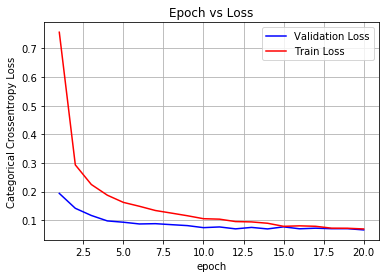

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

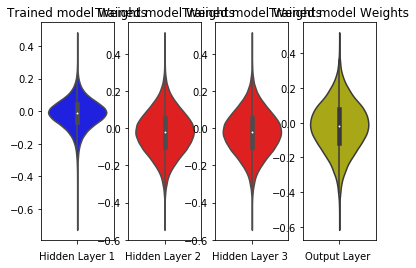

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)

out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

ACTIVATION FUNCTION: SIGMOID

MLP WITH 3 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + BN +*ADAM* OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_sigmoid = Sequential()
#Let's take dimension of first, second and third hidden layer 500, 300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.054  => N(0,σ) = N(0,0.054)
# h2 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h3 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)

model_sigmoid.add(Dense(550, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))


model_sigmoid.add(Dense(250, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )

model_sigmoid.add(BatchNormalization())

model_sigmoid.add(Dense(125, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)) )

model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 550)               431750    
_________________________________________________________________
dense_37 (Dense)             (None, 250)               137750    
_________________________________________________________________
batch_normalization_13 (Batc (None, 250)               1000      
_________________________________________________________________
dense_38 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1260      
Total params: 603,135
Trainable params: 602,635
Non-trainable params: 500
_________________________________________________________________


In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3174 - acc: 0.9128 - val_loss: 0.3599 - val_acc: 0.8812
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1471 - acc: 0.9569 - val_loss: 0.1464 - val_acc: 0.9559
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0963 - acc: 0.9712 - val_loss: 0.1201 - val_acc: 0.9630
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0693 - acc: 0.9791 - val_loss: 0.1341 - val_acc: 0.9557
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0527 - acc: 0.9838 - val_loss: 0.1062 - val_acc: 0.9662
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0403 - acc: 0.9877 - val_loss: 0.1173 - val_acc: 0.9651
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0334 - acc: 0.9897 - val_loss: 0.1097 - val_acc

Test score: 0.09291826827333426
Test accuracy: 0.977


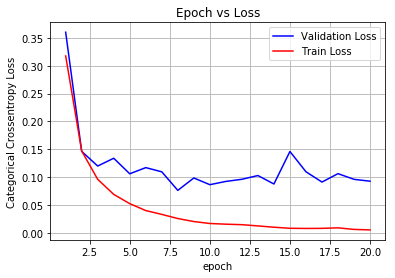

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

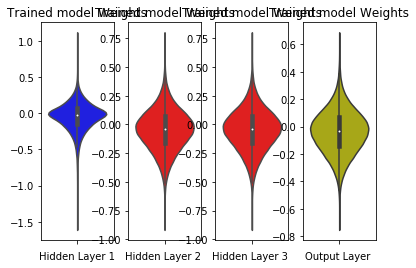

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)

out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 3 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + BN + DROPOUT + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_sigmoid = Sequential()
#Let's take dimension of first, second and third hidden layer 550, 250 and 1250 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.054  => N(0,σ) = N(0,0.054)
# h2 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h3 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)



model_sigmoid.add(Dense(550, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))
model_sigmoid.add(Dropout(0.5))

model_sigmoid.add(Dense(250, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )

#Adding batchNormalization in hidden layer 2 to perform better internal covariate shift
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))

model_sigmoid.add(Dense(125, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)) )
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 550)               431750    
_________________________________________________________________
dropout_17 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 250)               137750    
_________________________________________________________________
batch_normalization_14 (Batc (None, 250)               1000      
_________________________________________________________________
dropout_18 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 125)               31375     
_________________________________________________________________
dropout_19 (Dropout)         (None, 125)             

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid .fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.8674 - acc: 0.7210 - val_loss: 0.2813 - val_acc: 0.9152
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.3756 - acc: 0.8908 - val_loss: 0.1982 - val_acc: 0.9413
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2782 - acc: 0.9194 - val_loss: 0.1533 - val_acc: 0.9539
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2276 - acc: 0.9364 - val_loss: 0.1279 - val_acc: 0.9620
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1986 - acc: 0.9440 - val_loss: 0.1137 - val_acc: 0.9660
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1752 - acc: 0.9500 - val_loss: 0.1026 - val_acc: 0.9704
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1542 - acc: 0.9560 - val_loss: 0.1002 - val_acc

Test score: 0.06424049119630362
Test accuracy: 0.9824


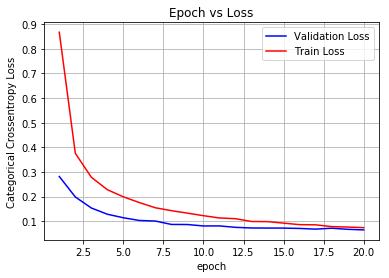

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

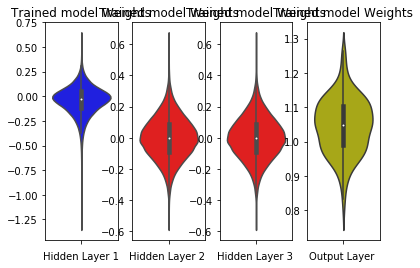

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)

out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 3 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + DROPOUT + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers import Dropout
model_sigmoid  = Sequential()
#Let's take dimension of first, second and third hidden layer 550, 250 and 1250 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.054  => N(0,σ) = N(0,0.054)
# h2 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)
# h3 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)


model_sigmoid.add(Dense(550, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(250, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )
model_sigmoid.add(Dropout(0.5))
model_relu.add(Dense(125, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 550)               431750    
_________________________________________________________________
dropout_20 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 250)               137750    
_________________________________________________________________
dropout_21 (Dropout)         (None, 250)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                2510      
Total params: 572,010
Trainable params: 572,010
Non-trainable params: 0
_______________________________________________

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.9675 - acc: 0.6864 - val_loss: 0.3204 - val_acc: 0.9085
Epoch 2/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.4205 - acc: 0.8771 - val_loss: 0.2383 - val_acc: 0.9282
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.3285 - acc: 0.9040 - val_loss: 0.1960 - val_acc: 0.9403
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2756 - acc: 0.9193 - val_loss: 0.1647 - val_acc: 0.9489
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2369 - acc: 0.9313 - val_loss: 0.1420 - val_acc: 0.9544
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2086 - acc: 0.9391 - val_loss: 0.1261 - val_acc: 0.9604
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1852 - acc: 0.9456 - val_loss: 0.1199 - val_acc

Test score: 0.06759547849583032
Test accuracy: 0.98


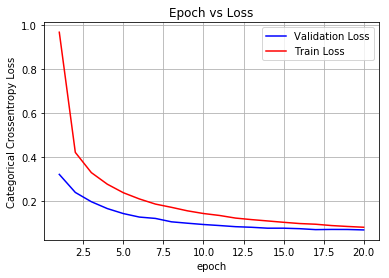

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

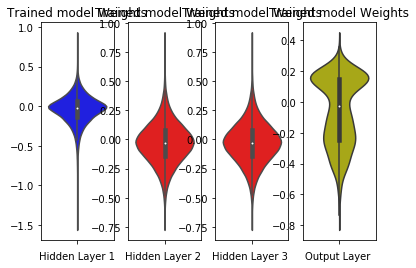

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)

out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 5 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + BN + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 600,500,400,300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.057  => N(0,σ) = N(0,0.057)
# h2 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)
model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
#Adding batchNormalization in hidden layer 2 and layer 4 to perform better internal covariate shift
model_relu.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_relu.add(BatchNormalization())

model_relu.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )

model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )


model_relu.add(BatchNormalization())


model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_49 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_15 (Batc (None, 500)               2000      
_________________________________________________________________
dense_50 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_51 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_16 (Batc (None, 300)               1200      
_________________________________________________________________
dense_52 (Dense)             (None, 100)             

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu .compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2149 - acc: 0.9344 - val_loss: 0.1454 - val_acc: 0.9569
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0931 - acc: 0.9704 - val_loss: 0.1218 - val_acc: 0.9604
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0656 - acc: 0.9791 - val_loss: 0.1035 - val_acc: 0.9700
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0532 - acc: 0.9834 - val_loss: 0.0930 - val_acc: 0.9713
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0442 - acc: 0.9856 - val_loss: 0.1093 - val_acc: 0.9667
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0400 - acc: 0.9863 - val_loss: 0.0983 - val_acc: 0.9737
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0355 - acc: 0.9887 - val_loss: 0.1036 - val_acc

Test score: 0.08874512081510293
Test accuracy: 0.9793


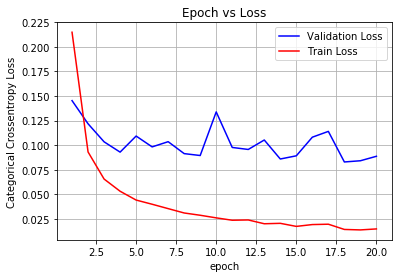

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

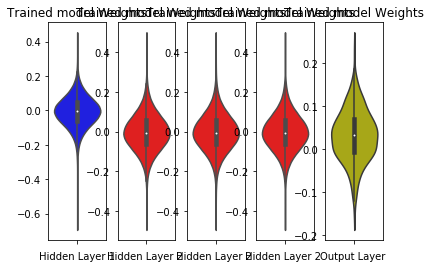

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[5].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 5 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + BN + DROPOUT + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_relu = Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 600,500,400,300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.057  => N(0,σ) = N(0,0.057)
# h2 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)

model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_relu.add(Dropout(0.5))
#Adding batchNormalization in hidden layer 2 and layer 4 to perform better internal covariate shift
model_relu.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_23 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_17 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_24 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_25 (Dropout)         (None, 400)             

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nb_epoch=30
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 113us/step - loss: 1.9353 - acc: 0.5319 - val_loss: 0.4032 - val_acc: 0.8916
Epoch 2/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.5320 - acc: 0.8418 - val_loss: 0.2061 - val_acc: 0.9394
Epoch 3/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.3453 - acc: 0.9019 - val_loss: 0.1586 - val_acc: 0.9546
Epoch 4/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2784 - acc: 0.9239 - val_loss: 0.1313 - val_acc: 0.9623
Epoch 5/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.2317 - acc: 0.9373 - val_loss: 0.1126 - val_acc: 0.9677
Epoch 6/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2005 - acc: 0.9459 - val_loss: 0.1057 - val_acc: 0.9705
Epoch 7/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.1816 - acc: 0.9512 - val_loss: 0.0942 - val_ac

Test score: 0.06920283458168933
Test accuracy: 0.9846


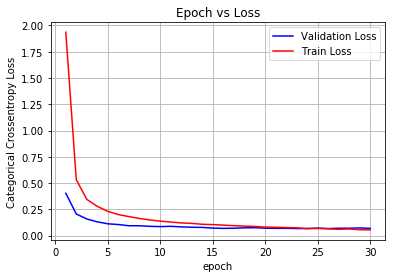

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

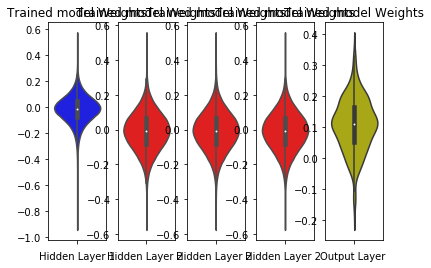

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[5].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 5 HIDDEN LAYERS+ RELU(ACTIVATION FUNCTION) + DROPOUT + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers import Dropout
model_relu = Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 600,500,400,300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.057  => N(0,σ) = N(0,0.057)
# h2 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)


model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_relu.add(Dropout(0.5))

model_relu.add(Dense(500, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_28 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 500)               300500    
_________________________________________________________________
dropout_29 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_30 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 300)             

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.0781 - acc: 0.9757 - val_loss: 0.0652 - val_acc: 0.9804
Epoch 2/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0748 - acc: 0.9767 - val_loss: 0.0637 - val_acc: 0.9802
Epoch 3/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0711 - acc: 0.9788 - val_loss: 0.0638 - val_acc: 0.9805
Epoch 4/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0685 - acc: 0.9789 - val_loss: 0.0631 - val_acc: 0.9806
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0646 - acc: 0.9800 - val_loss: 0.0637 - val_acc: 0.9813
Epoch 6/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0635 - acc: 0.9806 - val_loss: 0.0627 - val_acc: 0.9813
Epoch 7/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0586 - acc: 0.9819 - val_loss: 0.0624 - val_acc

Test score: 2.7269548736572267
Test accuracy: 0.0924


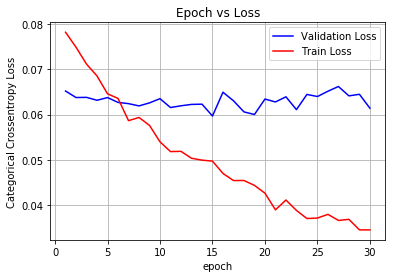

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

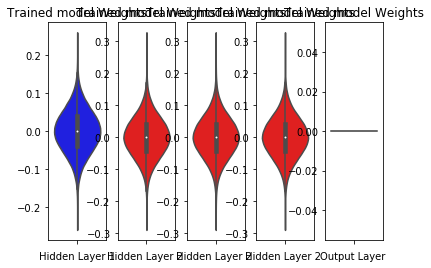

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[5].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 5 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + BN +*ADAM* OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_sigmoid = Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 600,500,400,300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.057  => N(0,σ) = N(0,0.057)
# h2 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)
model_sigmoid.add(Dense(600, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
#Adding batchNormalization in hidden layer 2 and layer 4 to perform better internal covariate shift
model_sigmoid.add(Dense(500, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_sigmoid.add(BatchNormalization())

model_sigmoid.add(Dense(400, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )

model_sigmoid.add(Dense(300, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )


model_sigmoid.add(BatchNormalization())


model_sigmoid.add(Dense(100, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )

model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_67 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_19 (Batc (None, 500)               2000      
_________________________________________________________________
dense_68 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_69 (Dense)             (None, 300)               120300    
_________________________________________________________________
batch_normalization_20 (Batc (None, 300)               1200      
_________________________________________________________________
dense_70 (Dense)             (None, 100)             

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 109us/step - loss: 0.2749 - acc: 0.9227 - val_loss: 0.3888 - val_acc: 0.8681
Epoch 2/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.1228 - acc: 0.9628 - val_loss: 0.1623 - val_acc: 0.9473
Epoch 3/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0864 - acc: 0.9725 - val_loss: 0.1096 - val_acc: 0.9648
Epoch 4/30
60000/60000 [==============================] - 4s 70us/step - loss: 0.0648 - acc: 0.9800 - val_loss: 0.0919 - val_acc: 0.9701
Epoch 5/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0514 - acc: 0.9840 - val_loss: 0.1121 - val_acc: 0.9667
Epoch 6/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0433 - acc: 0.9863 - val_loss: 0.0935 - val_acc: 0.9717
Epoch 7/30
60000/60000 [==============================] - 4s 65us/step - loss: 0.0398 - acc: 0.9870 - val_loss: 0.1191 - val_ac

Test score: 0.09157210679570563
Test accuracy: 0.9773


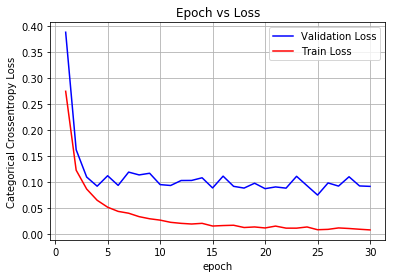

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

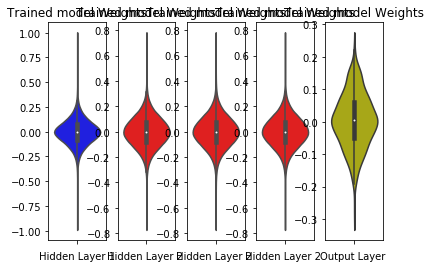

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[5].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 5 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + BN + DROPOUT + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers.normalization import BatchNormalization

model_sigmoid= Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 600,500,400,300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.057  => N(0,σ) = N(0,0.057)
# h2 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)

model_sigmoid.add(Dense(600, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_sigmoid.add(Dropout(0.5))
#Adding batchNormalization in hidden layer 2 and layer 4 to perform better internal covariate shift
model_sigmoid.add(Dense(500, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))

model_sigmoid.add(Dense(400, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )
model_sigmoid.add(Dropout(0.5))

model_relu.add(Dense(300, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_sigmoid.add(Dense(100, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model_sigmoid.add(Dropout(0.5))

model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_33 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_21 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_34 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_35 (Dropout)         (None, 400)             

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nb_epoch=30
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 104us/step - loss: 0.9401 - acc: 0.7036 - val_loss: 0.2700 - val_acc: 0.9214
Epoch 2/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.3671 - acc: 0.9009 - val_loss: 0.1882 - val_acc: 0.9466
Epoch 3/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.2742 - acc: 0.9262 - val_loss: 0.1541 - val_acc: 0.9574
Epoch 4/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.2305 - acc: 0.9389 - val_loss: 0.1312 - val_acc: 0.9628
Epoch 5/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.1967 - acc: 0.9474 - val_loss: 0.1146 - val_acc: 0.9672
Epoch 6/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.1778 - acc: 0.9525 - val_loss: 0.1071 - val_acc: 0.9687
Epoch 7/30
60000/60000 [==============================] - 4s 60us/step - loss: 0.1621 - acc: 0.9565 - val_loss: 0.1019 - val_ac

Test score: 0.07377234319790732
Test accuracy: 0.9834


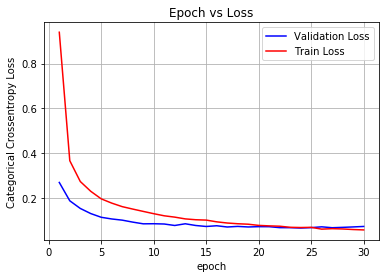

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

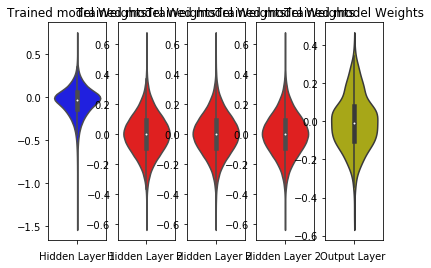

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[5].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH 5 HIDDEN LAYERS+ SIGMOID(ACTIVATION FUNCTION) + DROPOUT + ADAM OPTIMIZER

In [0]:
#importing batchNormalization
from keras.layers import Dropout
model_sigmoid= Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 600,500,400,300 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.057  => N(0,σ) = N(0,0.057)
# h2 =>  σ=√(2/(fan_in) = 0.063  => N(0,σ) = N(0,0.063)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.081  => N(0,σ) = N(0,0.081)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)


model_sigmoid.add(Dense(600, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_sigmoid.add(Dropout(0.5))

model_sigmoid.add(Dense(500, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_sigmoid.add(Dropout(0.5))

model_sigmoid.add(Dense(400, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )
model_sigmoid.add(Dropout(0.5))

model_sigmoid.add(Dense(300, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(100, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_38 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 500)               300500    
_________________________________________________________________
dropout_39 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 400)               200400    
_________________________________________________________________
dropout_40 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 300)             

In [0]:
#Applying adam optimizer to minimize cross entropy loss
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 97us/step - loss: 1.5338 - acc: 0.4492 - val_loss: 0.4749 - val_acc: 0.8807
Epoch 2/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.4975 - acc: 0.8721 - val_loss: 0.2706 - val_acc: 0.9299
Epoch 3/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3404 - acc: 0.9155 - val_loss: 0.2086 - val_acc: 0.9473
Epoch 4/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.2741 - acc: 0.9324 - val_loss: 0.1722 - val_acc: 0.9570
Epoch 5/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.2340 - acc: 0.9413 - val_loss: 0.1552 - val_acc: 0.9587
Epoch 6/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.2000 - acc: 0.9492 - val_loss: 0.1427 - val_acc: 0.9613
Epoch 7/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.1820 - acc: 0.9533 - val_loss: 0.1227 - val_acc

Test score: 0.0802000011069118
Test accuracy: 0.9826


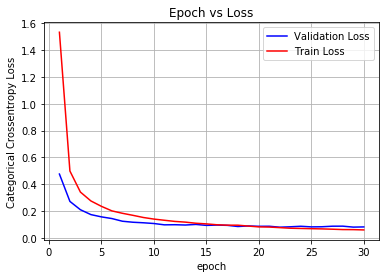

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_title('Epoch vs Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

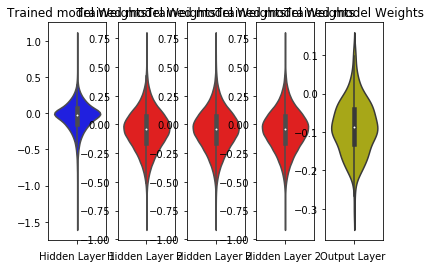

In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[5].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["No of layer","BN/DROPOUT","Activation function" ,"Accuracy %"]

x.add_row(["2","BN","RELU","98.06"])
x.add_row(["2","Dropout","RELU","98.32"])
x.add_row(["2","BN +DROPOUT","RELU","98.31"])

x.add_row(["2","BN","SIGMOID","97.88"])
x.add_row(["2","Dropout","SIGMOID","98.03"])
x.add_row(["2","BN +DROPOUT","SIGMOID","98.24"])


x.add_row(["3","BN","RELU","98.2"])
x.add_row(["3","Dropout","RELU","98.32"])
x.add_row(["3","BN +DROPOUT","RELU","98.34"])

x.add_row(["3","BN","SIGMOID","97.7"])
x.add_row(["3","Dropout","SIGMOID","98.0"])
x.add_row(["3","BN +DROPOUT","SIGMOID","98.24"])


x.add_row(["5","BN","RELU","97.93"])
x.add_row(["5","Dropout","RELU","92.4"])
x.add_row(["5","BN +DROPOUT","RELU","98.46"])

x.add_row(["5","BN","SIGMOID","97.7"])
x.add_row(["5","Dropout","SIGMOID","98.26"])
x.add_row(["5","BN +DROPOUT","SIGMOID","98.34"])



print(x)

+-------------+-------------+---------------------+------------+
| No of layer |  BN/DROPOUT | Activation function | Accuracy % |
+-------------+-------------+---------------------+------------+
|      2      |      BN     |         RELU        |   98.06    |
|      2      |   Dropout   |         RELU        |   98.32    |
|      2      | BN +DROPOUT |         RELU        |   98.31    |
|      2      |      BN     |       SIGMOID       |   97.88    |
|      2      |   Dropout   |       SIGMOID       |   98.03    |
|      2      | BN +DROPOUT |       SIGMOID       |   98.24    |
|      3      |      BN     |         RELU        |    98.2    |
|      3      |   Dropout   |         RELU        |   98.32    |
|      3      | BN +DROPOUT |         RELU        |   98.34    |
|      3      |      BN     |       SIGMOID       |    97.7    |
|      3      |   Dropout   |       SIGMOID       |    98.0    |
|      3      | BN +DROPOUT |       SIGMOID       |   98.24    |
|      5      |      BN  

IN THIS ASSIGNMENT we have tried various architecture ,various models, different Activation function,tried on varoius layer,we have also plot violin plots for each model and by using different layer.and thus concluded RELU activation function works better than SIGMOID FUNCTION.

1.Accuracy for RELU Activation function performs better than Sigmoid Activation Function.

2.Batch Normalization works more better than dropout for Relu Activation Function.